In [1]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ptitprince as pt
from matplotlib import colors as mcolors
%matplotlib inline
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/mL_allTask/results/ridge/acc/'

Parcel_params = classification.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
taskList=['mem','glass','semantic','motor']
sns.set_style("white")
sns.set_context("talk")
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)

#Visualizing change scores from within to between
t_CV=pd.read_csv(outDir+'CV/acc.csv')
t_DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[1,2,3,4])
pairCV=pd.melt(t_CV,id_vars=['sub'],value_vars=['glass','semantic','motor','mem'], var_name='task', value_name='acc')
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Between'
pairCV['Analysis']='Within'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_glass=pair_res[pair_res.task=='glass']
pair_sem=pair_res[pair_res.task=='semantic']
#memory
pair_mem=pair_res[pair_res.task=='mem']

#change scores diff task same/diff sub
SS_diff=pd.read_csv(outDir+'SS/stats.csv', usecols=[1,2,3])
SS_diff['analysis']='Within'
BS_diff=pd.read_csv(outDir+'BS/stats.csv', usecols=[1,2,3])
BS_diff['analysis']='Between'
diff_res=pd.concat([SS_diff, BS_diff])
#motor
diff_motor=diff_res[diff_res.train_task=='motor']
#mixed
diff_glass=diff_res[diff_res.train_task=='glass']
diff_sem=diff_res[diff_res.train_task=='semantic']
#memory
diff_mem=diff_res[diff_res.train_task=='mem']

#plotACC of heatmaps for DS analysis
DS_heat=pd.read_csv(outDir+'DS/acc.csv', usecols=[1,2,3,4])


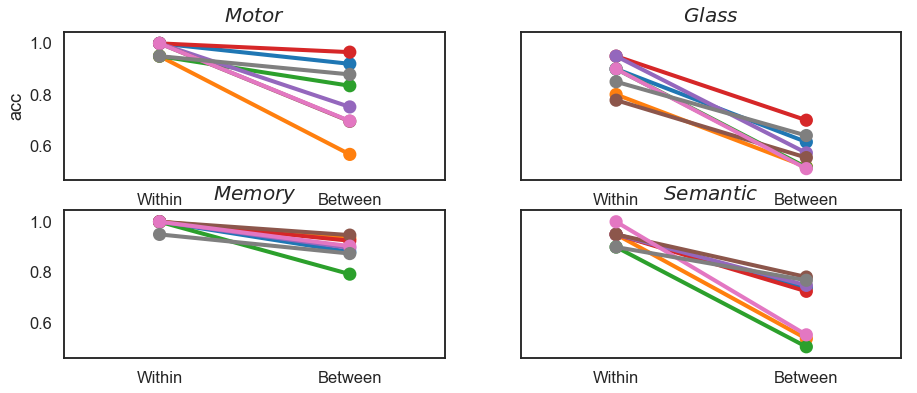

In [4]:
#Create figure space
fig=plt.figure(figsize=(15,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2)
#motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Within','Between'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
plt.xlabel('')
#mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Within','Between'])
ax.legend_.remove()
ax.set_title('$Glass$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Within','Between'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')

ax4=fig.add_subplot(gs[1,1],sharey=ax3)
plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Within','Between'])
ax.legend_.remove()
ax.set_title('$Semantic$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
plt.savefig(thisDir+'output/mL/images/ridge/figs/allTask_point_plots.png', bbox_inches='tight')

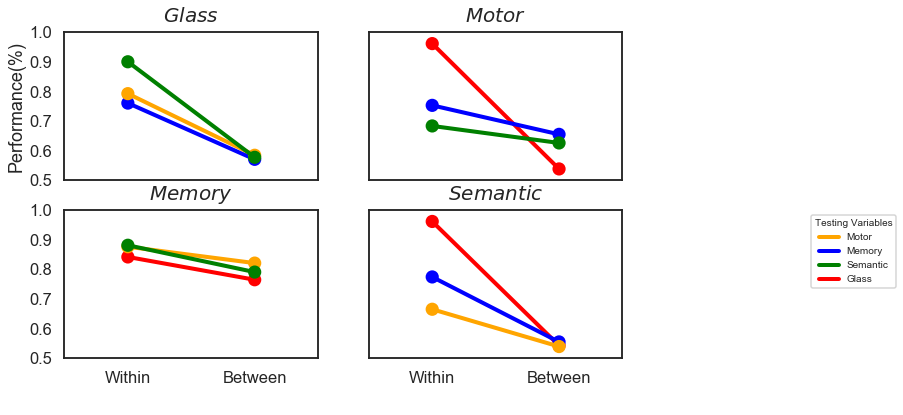

In [3]:
#separating out the different tasks 
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2)
#Glass
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", palette=['blue','orange','green'],ci=None, data=diff_glass, ax=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.legend_.remove()
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Performance(%)")
ax.set_title('$Glass$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#Motor
ax2=fig.add_subplot(gs[0,1])
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','blue','green'],ci=None, data=diff_motor, ax=ax2)
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
#Memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','orange','green'],ci=None, data=diff_mem, ax=ax3)
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
#ax.legend(custom_lines, ['Motor', 'Mixed', 'Memory'],loc='upper right',fontsize='medium',bbox_to_anchor=(2.1, 1),title='Testing Variables')
plt.savefig(thisDir+'output/mL/images/ridge/figs/sep_taskpoint_plots.png', bbox_inches='tight')
#Semantic
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['red','blue','orange'], data=diff_sem, ax=ax4)
ax.set_title('$Semantic$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Glass'],loc='upper right',fontsize='medium',bbox_to_anchor=(2.1, 1),title='Testing Variables')
plt.savefig(thisDir+'output/mL/images/ridge/figs/allTask_sep_taskpoint_plots.png', bbox_inches='tight')
